<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data_multi_delta_(_3_6)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-3.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-3.6_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,23.130683,96.297697,23.633690,-0.000053,153.062016,153.061944,0.000072
1,0.0,1.0,20.629478,51.192610,91.085408,-0.000824,172.906672,172.907529,-0.000856
2,0.0,2.0,65.724411,29.930774,95.304226,0.001069,200.960480,200.958804,0.001676
3,0.0,3.0,71.484297,94.755075,91.941585,-0.000088,268.180868,268.181131,-0.000264
4,0.0,4.0,43.051340,30.796317,29.648833,0.001439,113.497930,113.495376,0.002553
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,41.926498,47.880317,76.176355,0.000473,175.983643,175.983002,0.000641
19996,999.0,16.0,84.427796,43.910561,24.493642,0.000012,162.832011,162.831255,0.000755
19997,999.0,17.0,54.610499,53.326717,91.667883,0.000087,209.605185,209.605088,0.000097
19998,999.0,18.0,46.573662,96.288207,46.349038,-0.000204,199.210701,199.211085,-0.000384


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    23.130683  96.297697  23.633690  ...  153.062016  153.061944  0.000072
      1.0    20.629478  51.192610  91.085408  ...  172.906672  172.907529 -0.000856
      2.0    65.724411  29.930774  95.304226  ...  200.960480  200.958804  0.001676
      3.0    71.484297  94.755075  91.941585  ...  268.180868  268.181131 -0.000264
      4.0    43.051340  30.796317  29.648833  ...  113.497930  113.495376  0.002553
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   41.926498  47.880317  76.176355  ...  175.983643  175.983002  0.000641
      16.0   84.427796  43.910561  24.493642  ...  162.832011  162.831255  0.000755
      17.0   54.610499  53.326717  91.667883  ...  209.605185  209.605088  0.000097
      18.0   46.573662  96.288207  46.349038  ...  199.210701  199.211085 -0.000384
      19.0   97.875154  57.659553  48.613679  ...  214.148957  214.147970  0.000987

[20000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    23.130683  96.297697  23.633690  ...  153.062016  153.061944  0.000072
      1.0    20.629478  51.192610  91.085408  ...  172.906672  172.907529 -0.000856
      2.0    65.724411  29.930774  95.304226  ...  200.960480  200.958804  0.001676
      3.0    71.484297  94.755075  91.941585  ...  268.180868  268.181131 -0.000264
      4.0    43.051340  30.796317  29.648833  ...  113.497930  113.495376  0.002553
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   41.926498  47.880317  76.176355  ...  175.983643  175.983002  0.000641
      16.0   84.427796  43.910561  24.493642  ...  162.832011  162.831255  0.000755
      17.0   54.610499  53.326717  91.667883  ...  209.605185  209.605088  0.000097
      18.0   46.573662  96.288207  46.349038  ...  199.210701  199.211085 -0.000384
      19.0   97.875154  57.659553  48.613679  ...  214.148957  214.147970  0.000987

[20000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,23.130683,96.297697,23.633690,-0.000053,153.062016,153.061944,0.000072
1,0.0,1.0,20.629478,51.192610,91.085408,-0.000824,172.906672,172.907529,-0.000856
2,0.0,2.0,65.724411,29.930774,95.304226,0.001069,200.960480,200.958804,0.001676
3,0.0,3.0,71.484297,94.755075,91.941585,-0.000088,268.180868,268.181131,-0.000264
4,0.0,4.0,43.051340,30.796317,29.648833,0.001439,113.497930,113.495376,0.002553
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,41.926498,47.880317,76.176355,0.000473,175.983643,175.983002,0.000641
19996,999.0,16.0,84.427796,43.910561,24.493642,0.000012,162.832011,162.831255,0.000755
19997,999.0,17.0,54.610499,53.326717,91.667883,0.000087,209.605185,209.605088,0.000097
19998,999.0,18.0,46.573662,96.288207,46.349038,-0.000204,199.210701,199.211085,-0.000384


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    23.130683  96.297697  23.633690  ...  153.062016  153.061944  0.000072
      1.0    20.629478  51.192610  91.085408  ...  172.906672  172.907529 -0.000856
      2.0    65.724411  29.930774  95.304226  ...  200.960480  200.958804  0.001676
      3.0    71.484297  94.755075  91.941585  ...  268.180868  268.181131 -0.000264
      4.0    43.051340  30.796317  29.648833  ...  113.497930  113.495376  0.002553
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   41.926498  47.880317  76.176355  ...  175.983643  175.983002  0.000641
      16.0   84.427796  43.910561  24.493642  ...  162.832011  162.831255  0.000755
      17.0   54.610499  53.326717  91.667883  ...  209.605185  209.605088  0.000097
      18.0   46.573662  96.288207  46.349038  ...  199.210701  199.211085 -0.000384
      19.0   97.875154  57.659553  48.613679  ...  214.148957  214.147970  0.000987

[20000 rows x 7 columns]

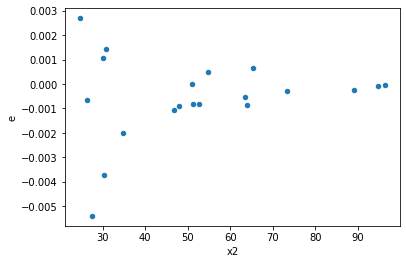

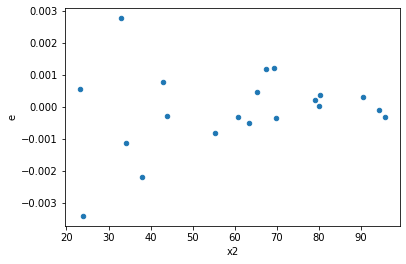

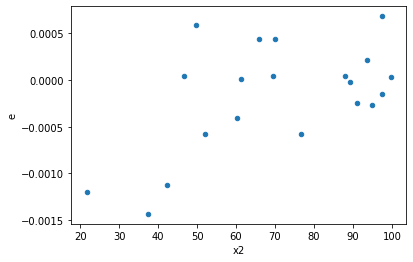

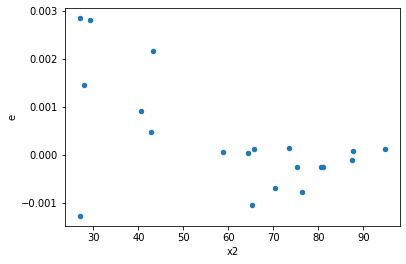

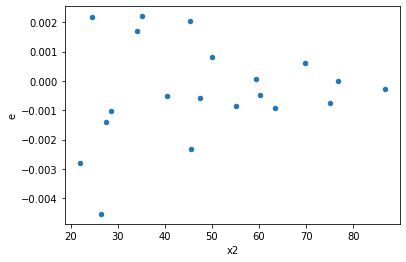

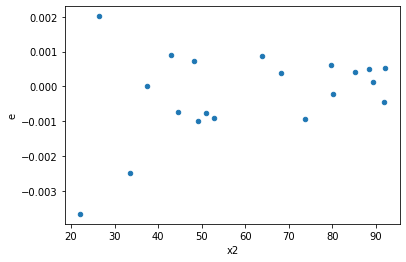

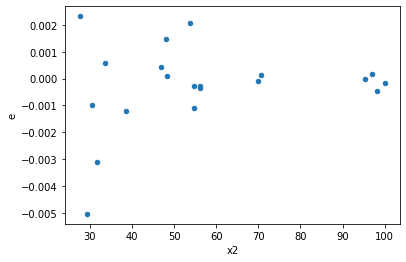

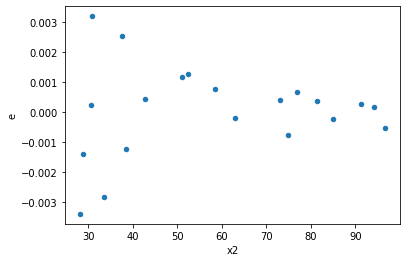

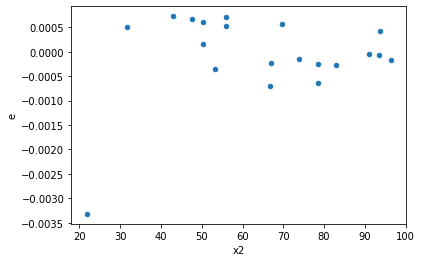

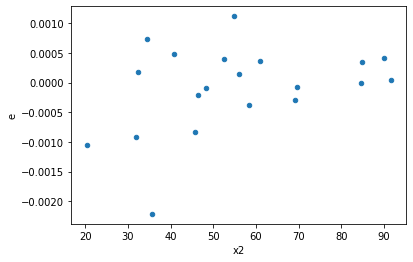

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,8.0,6.0,1.5306975389822973e-05,3.5894098330000886e-05,1.9133719237278716e-06,5.9823497216668145e-06,3.126600556577233,0.18203748867312086,0.9089812556634396,0.09101874433656043,Reject001=1 : Homoscedasticity
2.0,6.0,8.0,9.404105952330229e-07,1.837844414052414e-06,1.5673509920550382e-07,2.2973055175655174e-07,1.4657249902610496,0.6010398766260208,0.6994800616869896,0.3005199383130104,Reject001=1 : Homoscedasticity
3.0,5.0,9.0,1.8291720032048998e-06,1.1699061854734035e-05,3.6583440064097997e-07,1.299895761637115e-06,3.5532354512302895,0.09484670683055674,0.9525766465847216,0.04742335341527837,Reject001=1 : Homoscedasticity
5.0,6.0,8.0,7.094319485621131e-06,1.3744435347813276e-05,1.1823865809368552e-06,1.7180544184766595e-06,1.453039510238159,0.6087737649436364,0.6956131175281818,0.3043868824718182,Reject001=1 : Homoscedasticity
7.0,8.0,6.0,3.661070989954564e-06,1.943340009383346e-05,4.576338737443205e-07,3.23890001563891e-06,7.077491858586674,0.02816675411565228,0.9859166229421739,0.01408337705782614,Reject001=1 : Homoscedasticity
8.0,5.0,9.0,1.5456372853636229e-06,8.781537065243663e-06,3.0912745707272456e-07,9.757263405826292e-07,3.156388467793342,0.12812634935199863,0.9359368253240007,0.06406317467599931,Reject001=1 : Homoscedasticity
9.0,8.0,6.0,2.0689062516343173e-06,1.9289614422654688e-06,2.5861328145428966e-07,3.2149357371091146e-07,1.2431440949320927,0.8132231410377726,0.5933884294811137,0.4066115705188863,Reject001=1 : Homoscedasticity
13.0,9.0,5.0,1.0328717066516446e-06,1.5850155589367283e-05,1.1476352296129385e-07,3.1700311178734564e-06,27.62228830272672,0.0019349391045271336,0.9990325304477364,0.0009674695522635668,Reject001=0 : Heteroscedasticity
15.0,5.0,9.0,1.5848145592008896e-06,7.203633012941258e-05,3.1696291184017793e-07,8.004036681045842e-06,25.25228151955429,9.62122314269731e-05,0.9999518938842865,4.810611571348655e-05,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,8.0,6.0,1.5306975389822973e-05,3.5894098330000886e-05,1.9133719237278716e-06,5.9823497216668145e-06,3.126600556577233,0.18203748867312086,Reject001=1 : Homoscedasticity
1.0,6.0,8.0,1.3302036949394e-05,6.295058348487575e-06,2.2170061582323333e-06,7.868822935609469e-07,0.3549301343341081,0.22370787467654474,Reject001=1 : Homoscedasticity
2.0,6.0,8.0,9.404105952330229e-07,1.837844414052414e-06,1.5673509920550382e-07,2.2973055175655174e-07,1.4657249902610496,0.6010398766260208,Reject001=1 : Homoscedasticity
3.0,5.0,9.0,1.8291720032048998e-06,1.1699061854734035e-05,3.6583440064097997e-07,1.299895761637115e-06,3.5532354512302895,0.09484670683055674,Reject001=1 : Homoscedasticity
4.0,8.0,6.0,2.5369396513433067e-05,1.3194797450706341e-05,3.1711745641791334e-06,2.1991329084510567e-06,0.6934758285753051,0.615588402608963,Reject001=1 : Homoscedasticity
5.0,6.0,8.0,7.094319485621131e-06,1.3744435347813276e-05,1.1823865809368552e-06,1.7180544184766595e-06,1.453039510238159,0.6087737649436364,Reject001=1 : Homoscedasticity
6.0,10.0,4.0,3.881611930243817e-05,8.603218305782854e-07,3.881611930243817e-06,2.1508045764457135e-07,0.0554100877444133,0.000287529455850481,Reject001=0 : Heteroscedasticity
7.0,8.0,6.0,3.661070989954564e-06,1.943340009383346e-05,4.576338737443205e-07,3.23890001563891e-06,7.077491858586674,0.02816675411565228,Reject001=1 : Homoscedasticity
8.0,5.0,9.0,1.5456372853636229e-06,8.781537065243663e-06,3.0912745707272456e-07,9.757263405826292e-07,3.156388467793342,0.12812634935199863,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      571
Reject001=0 : Heteroscedasticity    429
Name: Result_test, dtype: int64